In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure
import numpy as np
import datetime as dt
matplotlib.rcParams['figure.figsize'] = (12,8)
import datetime
df = pd.read_csv ('movies.xls')


In [2]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#missing data numbers, if percentage wanted mean instead of sum 
for col in df.columns :
    num_missing=np.sum(df[col].isnull())
    print('{} - {}'.format(col,num_missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [4]:
df.dropna(inplace=True)
print(df.shape)
df.dtypes


(5421, 15)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
df = df.sort_values(by =['gross'], inplace=False, ascending =False )
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


In [7]:
pd.set_option('max_rows',10)
#pd.set_option('display.max_rows',None) #for all rows

In [27]:
# to find unique values llike distinct in sql  
df.count()
sorted_one=df['runtime'].drop_duplicates().sort_values(ascending =False)
sorted_one.nunique()


127

In [31]:
#we applied drop_duplicate so it is already unique, count, size (includes null values)
df['runtime'].count()

5421

<function matplotlib.pyplot.show(close=None, block=None)>

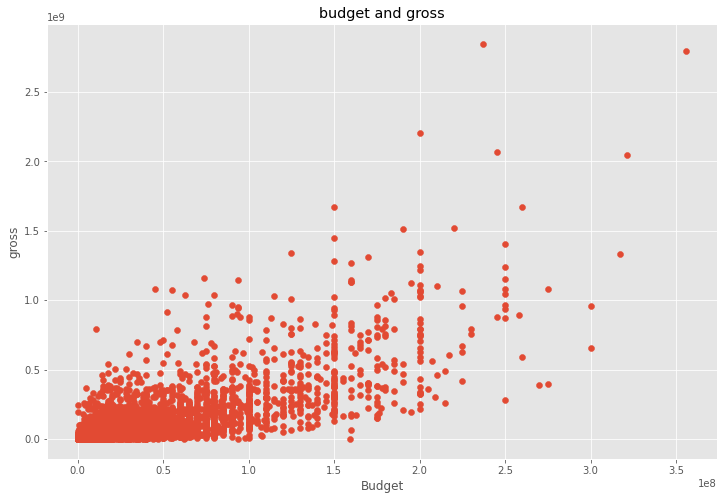

In [9]:
#now testing what is high correlation with gross
#check in budget first
#scatter plot with bufget and gross
plt.scatter(x =df['budget'],y =df['gross'])
plt.title ('budget and gross')
plt.xlabel ('Budget')
plt.ylabel('gross')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

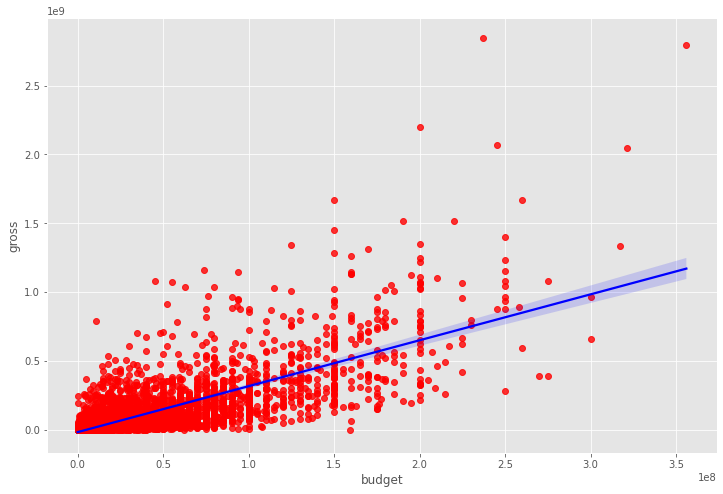

In [10]:
#seaborn plot with bufget and gross
sns.regplot(x='budget',y='gross', data =df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
#this graph shows these 2 are correlated, but how much ?

In [11]:
#that just work betwwen numerics
df.corr() #pearson is default corr one
#df.corr (method ='spearman') # and spearman another one

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

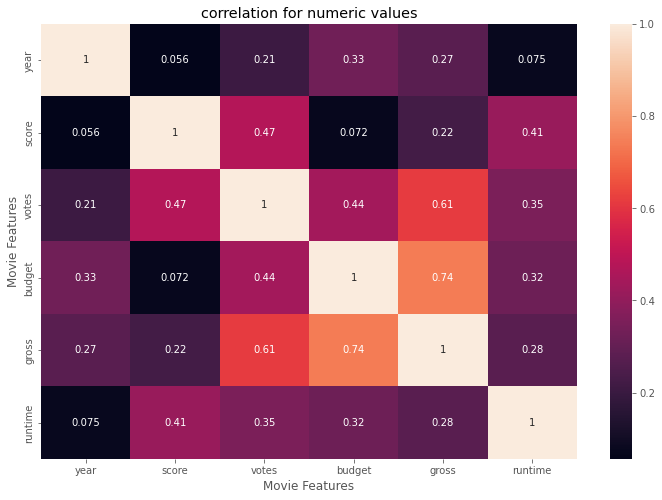

In [12]:
correlation_matrix =df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True) #annot is numbers on it
plt.title ('correlation for numeric values')
plt.xlabel ('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [13]:
#now it is for not numeric one like company
#oncelikle o non numericleri astype ile category ye cevirmek lazim then rondam numbers
df_numerized = df
for column in df_numerized.columns :
    if (df_numerized[column].dtype =='object'):
        df_numerized[column] = df_numerized[column].astype('category')
        df_numerized[column] = df_numerized[column].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


In [14]:
#if you want to see max number of company, can do like
#df.sort_values(by =['company'], inplace=False, ascending =False )


<function matplotlib.pyplot.show(close=None, block=None)>

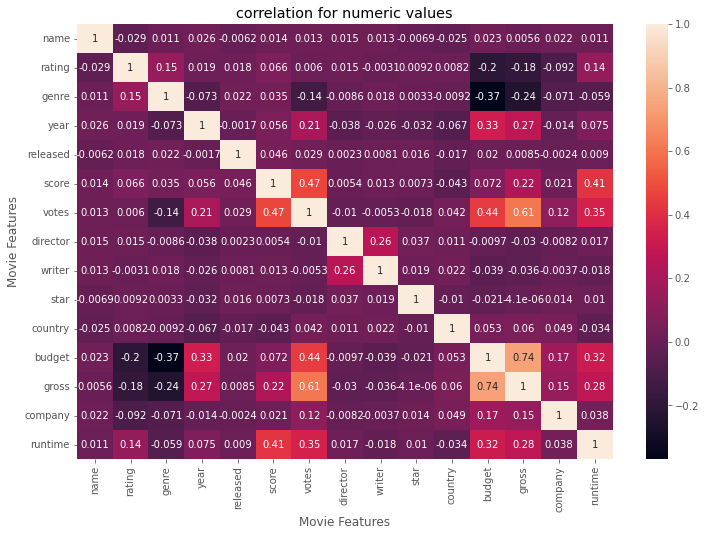

In [15]:
#for all features
correlation_matrix =df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True) #annot is numbers on it
plt.title ('correlation for numeric values')
plt.xlabel ('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [16]:
#to see corr in order for each
corr_each = correlation_matrix.unstack()
corr_each

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [17]:
pairs = corr_each.sort_values()
pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [18]:
high_cor = pairs[(pairs)>0.3]
high_cor

runtime  budget     0.318695
budget   runtime    0.318695
year     budget     0.327722
budget   year       0.327722
votes    runtime    0.352303
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 31, dtype: float64

In [19]:
#as a result in that project we learn
#find if nan values
#create plot and sort columns
#to clean data like dropna() rows, columns
#change datatypes of boolean and string to int
#create corr matrix for each of them and find hoghes one